In [3]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob

In [4]:
data_dir = "Data/"

In [5]:
os.path.join(data_dir,'Kun',"*")

'Data/Kun/*'

In [6]:
os.path.join(data_dir,"*")

'Data/*'

In [7]:
def load_dataset(path):
    images = []
    category = ["Kun","Tun"]
    for i in category:
        for image_path in glob.glob(os.path.join(path,i,"*")):
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            
            images.append(image)
    return images     

In [8]:
all_images = load_dataset(data_dir)

In [9]:
len(all_images)

400

In [10]:
all_images[0]

array([[[ 39,  47,  50],
        [ 31,  39,  42],
        [ 20,  28,  31],
        ...,
        [149, 145, 144],
        [139, 135, 134],
        [134, 130, 129]],

       [[117, 125, 128],
        [113, 121, 124],
        [111, 119, 122],
        ...,
        [255, 254, 253],
        [246, 242, 241],
        [255, 254, 253]],

       [[105, 113, 116],
        [103, 111, 114],
        [105, 113, 116],
        ...,
        [247, 245, 246],
        [255, 254, 255],
        [255, 254, 255]],

       ...,

       [[130, 147, 141],
        [122, 139, 133],
        [112, 129, 123],
        ...,
        [144, 157, 147],
        [214, 227, 218],
        [188, 201, 191]],

       [[129, 146, 140],
        [125, 142, 136],
        [114, 131, 125],
        ...,
        [160, 173, 164],
        [235, 246, 238],
        [170, 183, 174]],

       [[118, 133, 128],
        [127, 142, 137],
        [123, 138, 133],
        ...,
        [161, 172, 164],
        [247, 255, 249],
        [158, 169, 161]]

In [11]:
y_size = [i[0].shape[0] for i in all_images]
y_size

[800,
 800,
 640,
 800,
 800,
 1280,
 800,
 640,
 800,
 800,
 640,
 1280,
 640,
 800,
 640,
 1280,
 800,
 1024,
 857,
 1280,
 800,
 800,
 1280,
 1280,
 800,
 800,
 1024,
 640,
 1280,
 800,
 640,
 1280,
 800,
 800,
 800,
 1024,
 800,
 640,
 1280,
 800,
 800,
 640,
 800,
 1280,
 640,
 640,
 1024,
 800,
 640,
 640,
 640,
 640,
 1280,
 800,
 640,
 1024,
 640,
 640,
 640,
 640,
 800,
 1280,
 800,
 640,
 1280,
 1280,
 800,
 800,
 800,
 640,
 640,
 640,
 800,
 640,
 800,
 800,
 800,
 1024,
 640,
 640,
 1024,
 800,
 800,
 640,
 800,
 640,
 640,
 1280,
 1024,
 800,
 800,
 857,
 640,
 1280,
 800,
 640,
 640,
 800,
 640,
 1280,
 640,
 640,
 1280,
 800,
 800,
 1024,
 640,
 800,
 640,
 800,
 857,
 1280,
 800,
 800,
 800,
 1024,
 640,
 1280,
 800,
 640,
 800,
 1024,
 800,
 1280,
 640,
 1280,
 1280,
 800,
 800,
 800,
 800,
 800,
 640,
 1280,
 1024,
 640,
 1024,
 640,
 1280,
 640,
 800,
 800,
 1280,
 640,
 640,
 640,
 640,
 800,
 1280,
 800,
 800,
 640,
 640,
 800,
 857,
 640,
 640,
 640,
 1280,
 640,

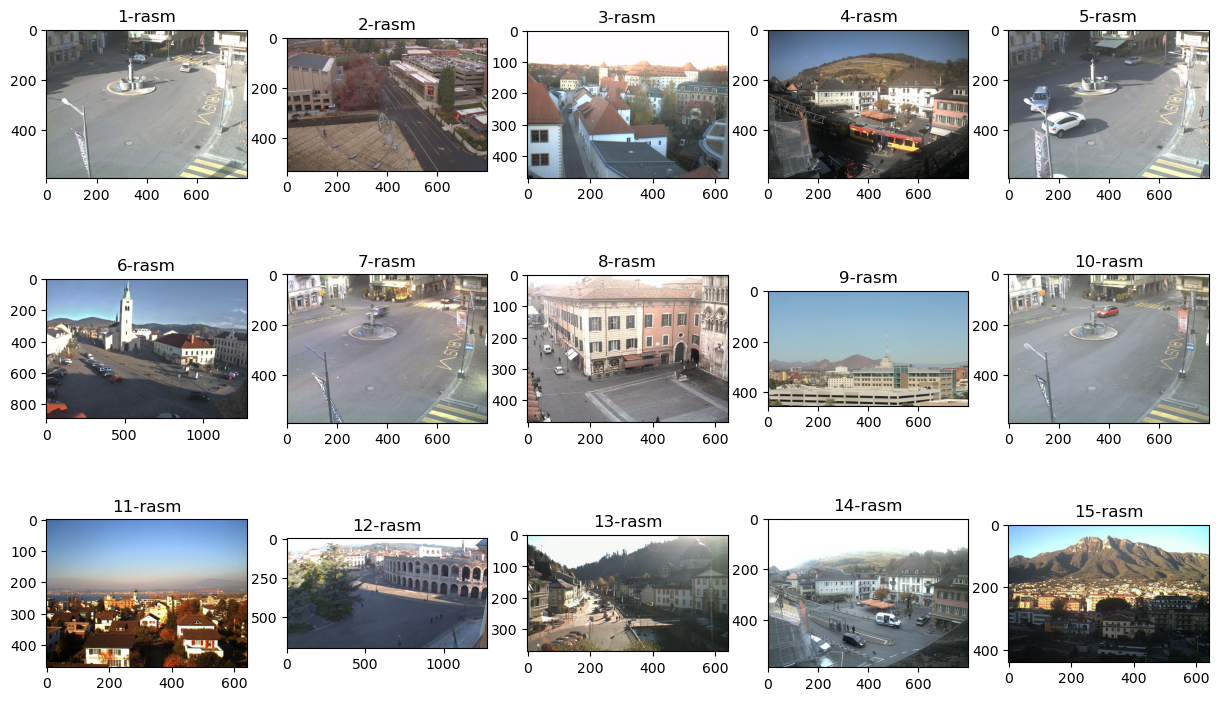

In [12]:
fig,axes = plt.subplots(3,5,figsize=(15,9))

s = 0
for i in range(3):
    for j in range(5):
        axes[i][j].set_title(f"{s+1}-rasm")
        axes[i][j].imshow(all_images[s])
        s+=1
plt.show()

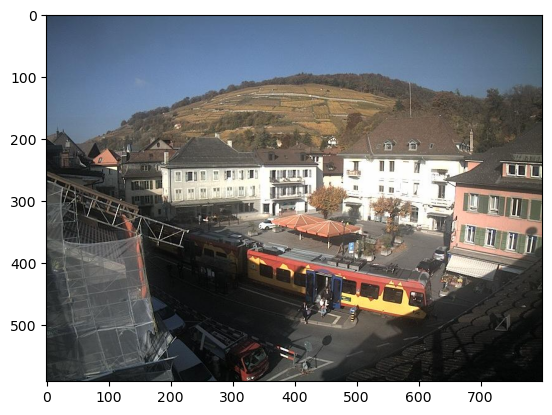

In [13]:
plt.imshow(all_images[3])

# Bir xil o'lchamga olib kelish

In [14]:
def same(image):
    image = cv2.resize(image,(860,570))
    return image

In [15]:
# def encode(target):
#     if target=='Kun':
#         target=1
#     else:
#         target=0

In [16]:
def preprocessing(all_images):
    prepared_images = []
    for i in all_images:
        prepared_images.append((same(i)))
    return prepared_images

In [17]:
prepared_images = preprocessing(all_images)

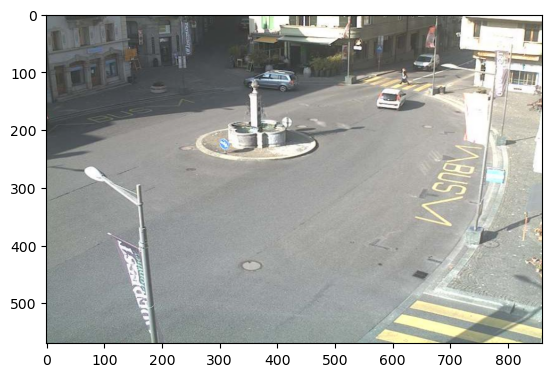

In [18]:
plt.imshow(prepared_images[0])

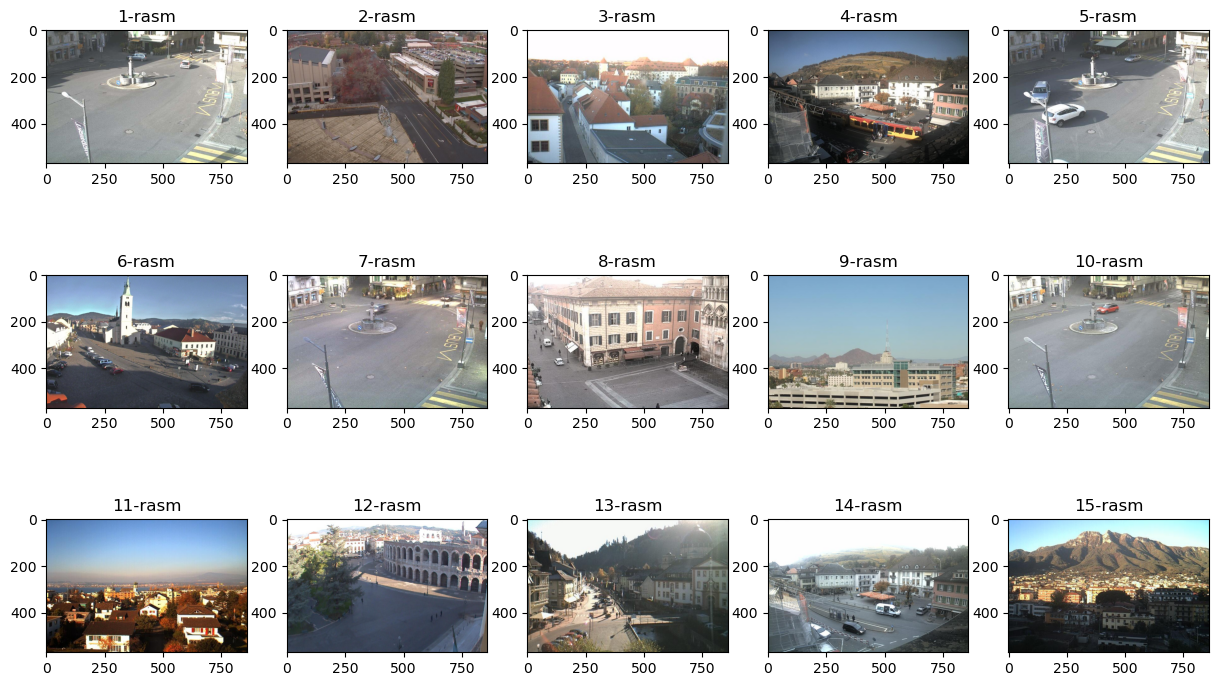

In [19]:
fig,axes = plt.subplots(3,5,figsize=(15,9))

s = 0
for i in range(3):
    for j in range(5):
        axes[i][j].set_title(f"{s+1}-rasm")
        axes[i][j].imshow(prepared_images[s])
        s+=1
plt.show()

In [20]:
#Barcha rasmlarni chiqarish 400 ta

# fig,axes = plt.subplots(80,5,figsize=(15,240))

# s = 0
# for i in range(80):
#     for j in range(5):
#         axes[i][j].set_title(f"{s+1}-rasm")
#         axes[i][j].imshow(prepared_images[s])
#         s+=1
# plt.show()

In [21]:
#Rasmlanri yuklab, bir xil o'lchamga olib keldik, endi MinMaxScaler va Train_Test_Split qoldi qilish kerak.
#Undan keyin esa Neural Network

# Model Selection and Preparing

In [22]:
X = prepared_images

In [23]:
y_1 = [1 for i in range(200)]
y_2 = [0 for i in range(200)]
Y = y_1+y_2
Y = np.asarray(Y)
Y.dtype

dtype('int64')

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

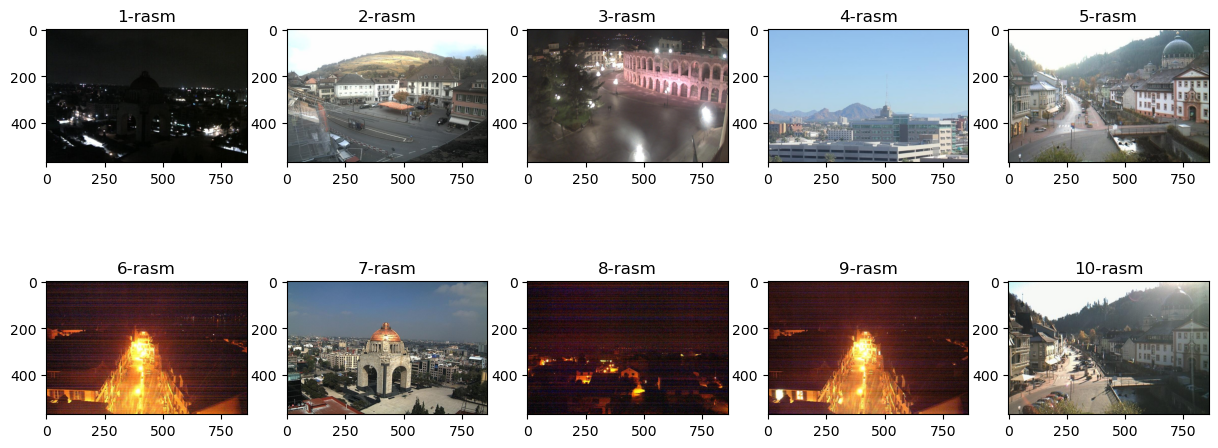

In [25]:
fig,axes = plt.subplots(2,5,figsize=(15,6))

s = 0
for i in range(2):
    for j in range(5):
        axes[i][j].set_title(f"{s+1}-rasm")
        axes[i][j].imshow(x_train[s])
        s+=1
plt.show()

In [26]:
y_train[:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [27]:
def to_float64(images):
    float_images = []
    for i in range(len(images)):
        image = images[i].astype(np.float64)/255.0
        float_images.append(image)
    return float_images

In [28]:
x_train = to_float64(x_train)

In [29]:
x_test = to_float64(x_test)

In [30]:
x_test


[array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(570,860,3)),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid'),
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1470600)           0         
                                                                 
 dense (Dense)               (None, 200)               294120200 
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 294,140,502
Trainable params: 294,140,502
Non-trainable params: 0
_________________________________________________________________


In [33]:
y_train.dtype

dtype('int64')

In [34]:
loss = keras.losses.BinaryCrossentropy()
optim = keras.optimizers.SGD(learning_rate=0.001)

In [35]:
model.compile(optimizer=optim, loss=loss,metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=5)

ValueError: Data cardinality is ambiguous:
  x sizes: 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570
  y sizes: 320
Make sure all arrays contain the same number of samples.

In [ ]:
x_train[0].shape

In [37]:
x_train[0].shape

(570, 860, 3)

In [41]:
y_train.shape

(320,)